In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud

data = pd.read_csv("/content/twitter_training.csv")
data.columns = ['ID', 'Entity', 'Sentiment', 'Message']

print(data.head())

     ID       Entity Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                             Message  
0  I am coming to the borders and I will kill you...  
1  im getting on borderlands and i will kill you ...  
2  im coming on borderlands and i will murder you...  
3  im getting on borderlands 2 and i will murder ...  
4  im getting into borderlands and i can murder y...  


In [3]:
import re
import nltk
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [4]:
def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    text = text.lower()
    text = text.split()
    stop_words = set(stopwords.words('english'))
    text = [word for word in text if word not in stop_words]
    return ' '.join(text)

In [5]:
data['cleaned_text'] = data['Message'].apply(clean_text)

print(data[['Message', 'cleaned_text']].head())

sia = SentimentIntensityAnalyzer()

                                             Message  \
0  I am coming to the borders and I will kill you...   
1  im getting on borderlands and i will kill you ...   
2  im coming on borderlands and i will murder you...   
3  im getting on borderlands 2 and i will murder ...   
4  im getting into borderlands and i can murder y...   

                      cleaned_text  
0              coming borders kill  
1      im getting borderlands kill  
2     im coming borderlands murder  
3  im getting borderlands 2 murder  
4    im getting borderlands murder  


In [6]:
sentiment_counts = data['Message'].value_counts(normalize=True) * 100
print(sentiment_counts)

Message
At the same time, despite the fact that there are currently some 100 million people living below the poverty line, most of them do not have access to health services and do not have access to health care, while most of them do not have access to health care.    0.236045
                                                                                                                                                                                                                                                                      0.236045
It is not the first time that the EU Commission has taken such a step.                                                                                                                                                                                                0.236045
<unk>                                                                                                                                                                              

In [7]:
def get_sentiment(text):
    score = sia.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'positive'
    elif score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

data['sentiment'] = data['cleaned_text'].apply(get_sentiment)

In [8]:
data['vader_sentiment'] = data['cleaned_text'].apply(get_sentiment)

sentiment_counts = data['vader_sentiment'].value_counts(normalize=True) * 100
print(sentiment_counts)

vader_sentiment
positive    47.726699
negative    33.733266
neutral     18.540035
Name: proportion, dtype: float64


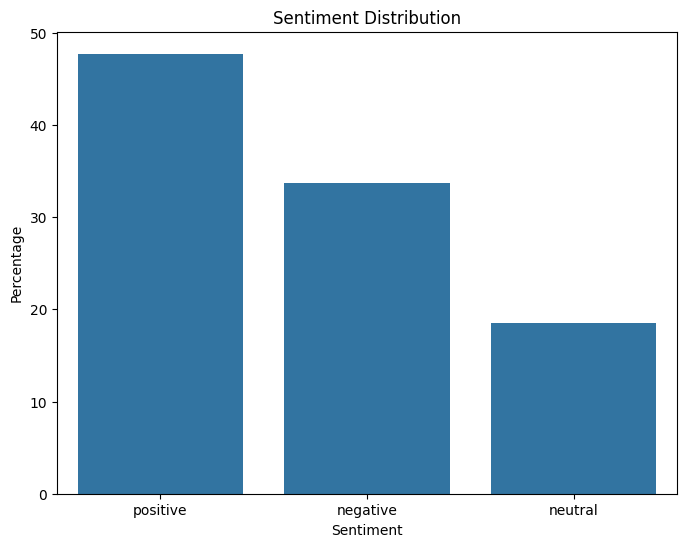

In [9]:
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.show()

In [10]:
positive_text = ' '.join(data[data['vader_sentiment'] == 'positive']['cleaned_text'])
negative_text = ' '.join(data[data['vader_sentiment'] == 'negative']['cleaned_text'])

In [11]:
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(negative_text)

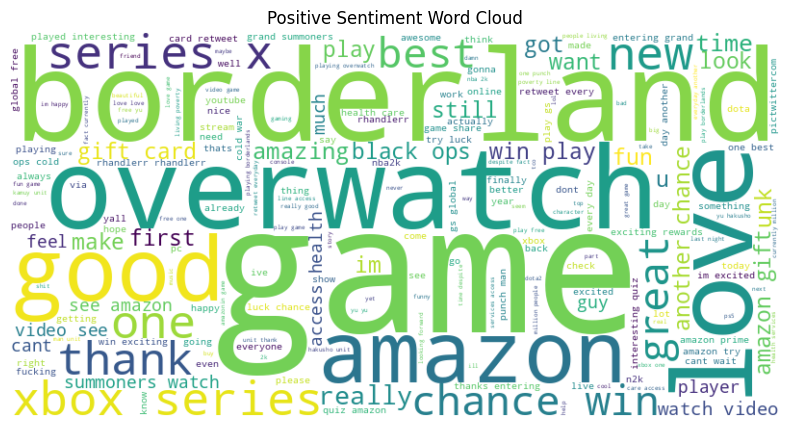

In [12]:
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Sentiment Word Cloud')
plt.show()

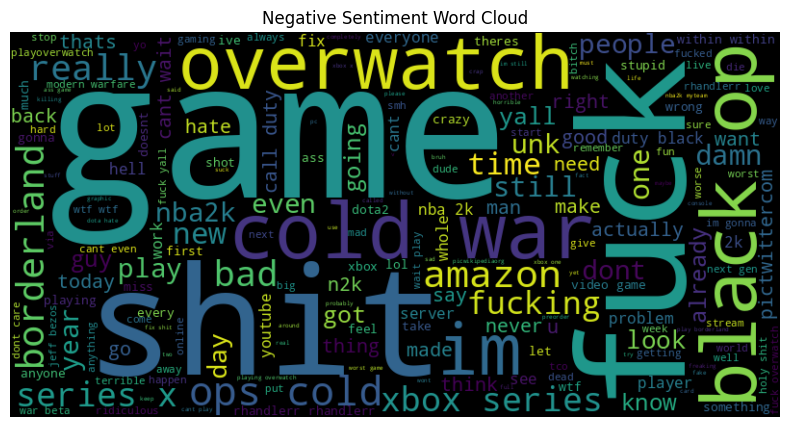

In [13]:
plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Sentiment Word Cloud')
plt.show()

<ipython-input-14-11376e384772>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=data, palette='Set2')


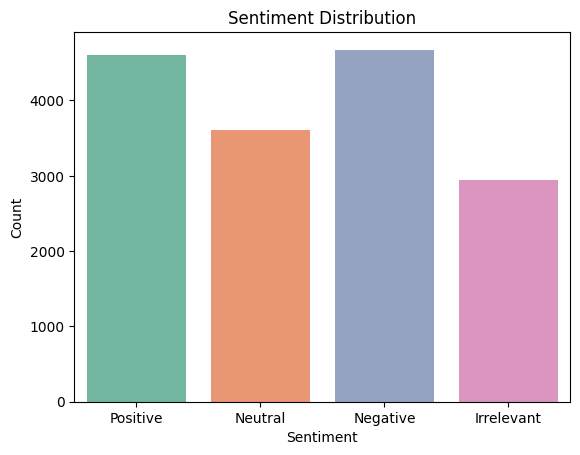

In [14]:
sns.countplot(x='Sentiment', data=data, palette='Set2')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

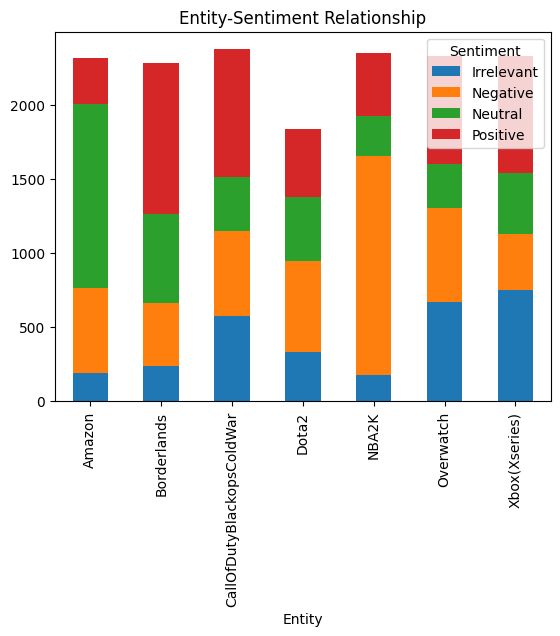

In [16]:
entity_sentiment_counts = data.groupby(['Entity', 'Sentiment']).size().unstack()
entity_sentiment_counts.plot(kind='bar', stacked=True)
plt.title('Entity-Sentiment Relationship')
plt.show()

Text(0.5, 1.0, 'Distribution of tweets per Branch and sentiment')

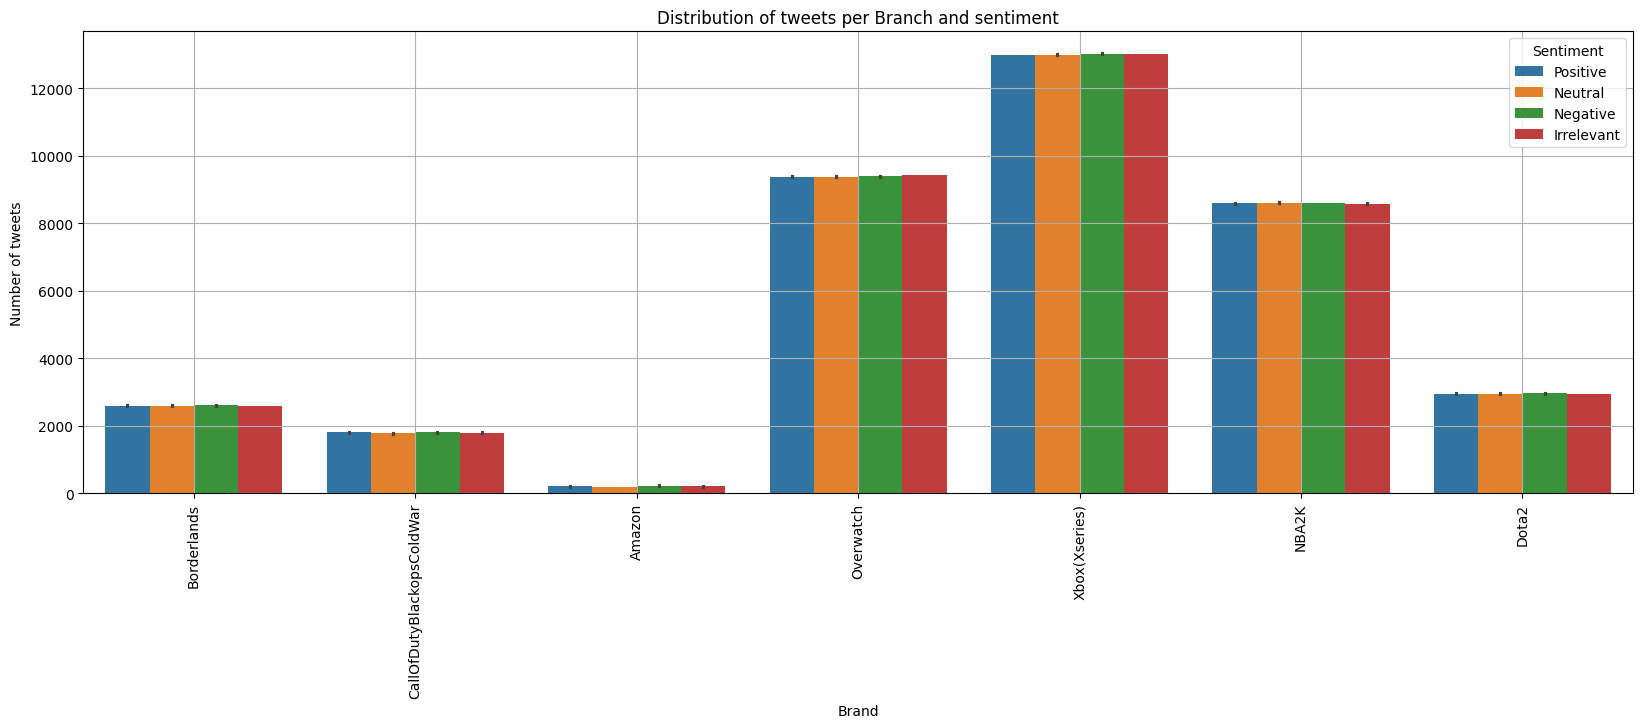

In [17]:
plt.figure(figsize=(20,6))
sns.barplot(data=data,x="Entity",y="ID",hue="Sentiment")
plt.xticks(rotation=90)
plt.xlabel("Brand")
plt.ylabel("Number of tweets")
plt.grid()
plt.title("Distribution of tweets per Branch and sentiment")